In [1]:
import math
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
df = pd.read_csv('./optimalturnrate2016.csv', index_col=0)

In [3]:
df

,Grade,Days_Salable,qty_Priced,qty_PricedSold,amt_PricedSold
0,1,0.0,44265,29183,219005.09
1,1,1.0,15776,15617,151993.10
2,1,2.0,15785,15611,171172.99
3,1,3.0,16197,16034,201335.04
4,1,4.0,14683,14495,175945.84
...,...,...,...,...,...
3560,5,966.0,360,1,4.00
3561,5,969.0,430,3,22.97
3562,5,970.0,423,1,3.00
3563,5,971.0,394,2,8.99


In [4]:
# df_all_dp = pd.read_excel('./DSP_DistByGrade.xlsx', sheet_name='Grades_All')
# df_sold_dp = pd.read_excel('./DSP_DistByGrade.xlsx', sheet_name='Grades_Sold')
# df_trash_dp = pd.read_excel('./DSP_DistByGrade.xlsx', sheet_name='Grades_Trashed')

# df_all_ds = pd.read_excel('./DSS_DistByGrade.xlsx', sheet_name='Grades_All')
# df_sold_ds = pd.read_excel('./DSS_DistByGrade.xlsx', sheet_name='Grades_Sold')
# df_trash_ds = pd.read_excel('./DSS_DistByGrade.xlsx', sheet_name='Grades_Trashed')

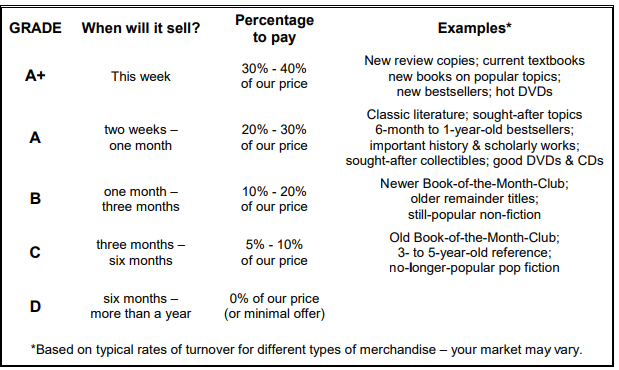

In [5]:
convert_grades_dict = {1: 'A', 2:'B', 3:'C', 4:'D', 5:'E'}

In [6]:
df['Grade'] = df['Grade'].map(convert_grades_dict)

In [7]:
# df_all_dp['Grade'] = df_all_dp['Grade'].map(convert_grades_dict)
# df_sold_dp['Grade'] = df_sold_dp['Grade'].map(convert_grades_dict)
# df_trash_dp['Grade'] = df_trash_dp['Grade'].map(convert_grades_dict)

# df_all_ds['Grade'] = df_all_ds['Grade'].map(convert_grades_dict)
# df_sold_ds['Grade'] = df_sold_ds['Grade'].map(convert_grades_dict)
# df_trash_ds['Grade'] = df_trash_ds['Grade'].map(convert_grades_dict)

In [8]:
df.describe()

,Days_Salable,qty_Priced,qty_PricedSold,amt_PricedSold
count,3565.000000,3565.000000,3565.000000,3.565000e+03
mean,437.056101,7863.133801,5922.439551,3.755556e+04
std,274.129586,22997.106987,20296.907317,1.350712e+05
min,0.000000,1.000000,1.000000,1.000000e+00
25%,198.000000,256.000000,26.000000,1.652600e+02
50%,420.000000,935.000000,354.000000,1.979120e+03
75%,665.000000,5297.000000,2834.000000,1.538646e+04
max,973.000000,511412.000000,398217.000000,1.913546e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 3564
Data columns (total 5 columns):
Grade             3565 non-null object
Days_Salable      3565 non-null float64
qty_Priced        3565 non-null int64
qty_PricedSold    3565 non-null int64
amt_PricedSold    3565 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 167.1+ KB


In [10]:
df['Days_Salable_Scanned'] = df['Days_Salable'].astype(int)

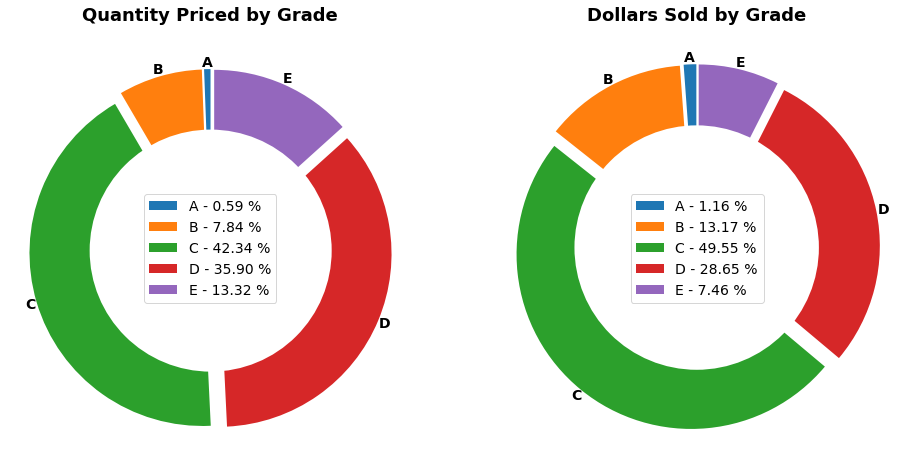

In [11]:
## Set up common elements
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

## Set up pie chart of all items priced
pie_all = df.groupby('Grade').sum()['qty_Priced']
explode_all = [0.05 for n in df.groupby('Grade').sum()['qty_Priced']]

pcts_all = 100.*pie_all/df['qty_Priced'].sum()


patches_all, text_all= ax1.pie(pie_all,
                               explode = explode_all, 
                               labels = pie_all.index,
                               labeldistance = 1.04,
                               radius = 1,
                               startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')

for t in text_all:
    t.set_fontsize(14)
    t.set_fontweight('bold')
    t.set_horizontalalignment('center')
    
labels_all = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_all.index, pcts_all)]

ax1.add_artist(centre_circle)
ax1.axis('equal')
ax1.legend(patches_all, labels_all, loc='center', fontsize=14)


ax1.title.set_position([.5, 1.01])
ax1.set_title('Quantity Priced by Grade', fontsize=18, fontweight='bold')

# ax1.legend(patches_all, labels_all, loc='center left', bbox_to_anchor=(-0.1, 1.),
#            fontsize=14)


## Set up pie chart of dollars from items sold
pie_sold = df.groupby('Grade').sum()['amt_PricedSold']
explode_sold = [0.05 for n in df.groupby('Grade').sum()['amt_PricedSold']]

pcts_sold = 100.*pie_sold/df['amt_PricedSold'].sum()


patches_sold, text_sold= ax2.pie(pie_sold,
                                 explode = explode_sold, 
                                 labels = pie_sold.index,
                                 labeldistance = 1.04,
                                 radius = 1,
                                 startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')

for t in text_sold:
    t.set_fontsize(14)
    t.set_fontweight('bold')
    t.set_horizontalalignment('center')

labels_sold = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_sold.index, pcts_sold)]

ax2.add_artist(centre_circle)
ax2.axis('equal')

ax2.legend(patches_sold, labels_sold, loc='center', fontsize=14)

ax2.title.set_position([.5, 1.01])
ax2.set_title('Dollars Sold by Grade', fontsize=18, fontweight='bold')

plt.show()

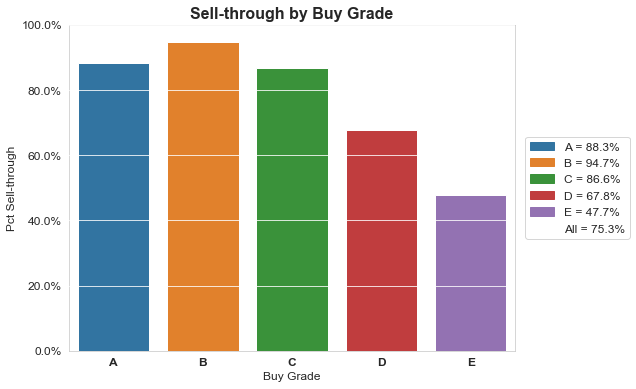

In [12]:
sns.set_style('whitegrid')
st_barplot_df = (df.groupby('Grade')['qty_PricedSold'].sum()/df.groupby('Grade')['qty_Priced'].sum())
st_barplot_df= st_barplot_df.reset_index()
st_barplot_df.columns = ['Grade', 'ST']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Grade', y='ST', data=st_barplot_df, ax=ax)


ax.set_ylim([0,1])

# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('Buy Grade', fontsize=12)
ax.set_ylabel('Pct Sell-through', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Sell-through by Buy Grade', fontsize=16, fontweight='bold')

legend_total = df['qty_PricedSold'].sum()/df['qty_Priced'].sum()
legend_labels = ['{0} = {1:.1%}'.format(v[0], v[1]) for (i, v) in st_barplot_df.iterrows()] \
                + ['All = {:.1%}'.format(legend_total)]
legend_colors = [p.get_facecolor() for p in ax.patches] + ['#ffffff']
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.27, 0.5), fontsize=12)


plt.show()

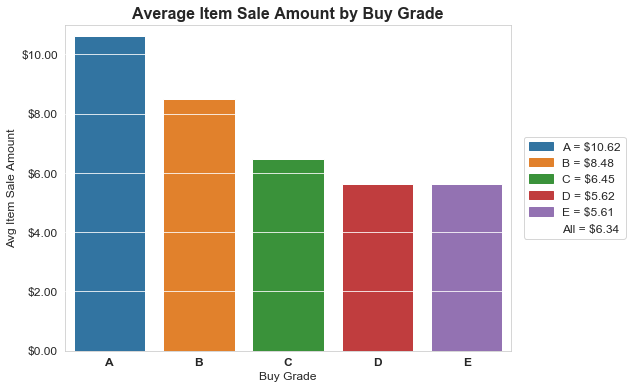

In [13]:
sns.set_style('whitegrid')
amt_barplot_df = df.groupby('Grade')['amt_PricedSold'].sum()/df.groupby('Grade')['qty_PricedSold'].sum()
amt_barplot_df= amt_barplot_df.reset_index()
amt_barplot_df.columns = ['Grade', 'AvgAmt']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Grade', y='AvgAmt', data=amt_barplot_df, ax=ax)

ax.set_ylim([0, math.ceil(amt_barplot_df['AvgAmt'].max())])
# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.2f}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('Buy Grade', fontsize=12)
ax.set_ylabel('Avg Item Sale Amount', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Average Item Sale Amount by Buy Grade', fontsize=16, fontweight='bold')

legend_total = df['amt_PricedSold'].sum()/df['qty_PricedSold'].sum()
legend_labels = ['{0} = ${1:.2f}'.format(v[0], v[1]) for (i, v) in amt_barplot_df.iterrows()] \
                + ['All = ${:.2f}'.format(legend_total)]
legend_colors = [p.get_facecolor() for p in ax.patches] + ['#ffffff']
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.27, 0.5), fontsize=12)
plt.show()

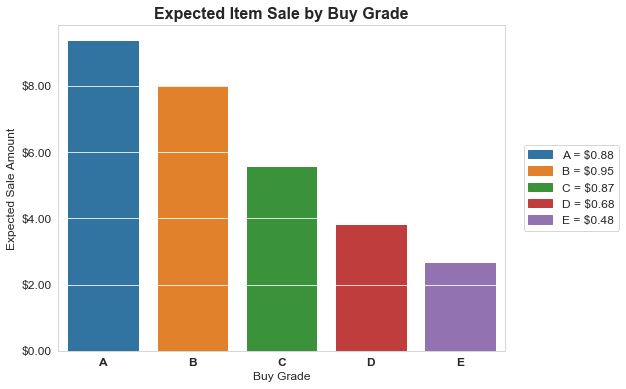

In [14]:
sns.set_style('whitegrid')
ev_barplot_df = (df.groupby('Grade')['qty_PricedSold'].sum()/df.groupby('Grade')['qty_Priced'].sum() *
                df.groupby('Grade')['amt_PricedSold'].sum()/df.groupby('Grade')['qty_PricedSold'].sum())
ev_barplot_df= ev_barplot_df.reset_index()
ev_barplot_df.columns = ['Grade', 'EV']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Grade', y='EV', data=ev_barplot_df, ax=ax)



# Get y tick values and reformat them as dollar amounts
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.2f}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('Buy Grade', fontsize=12)
ax.set_ylabel('Expected Sale Amount', fontsize=12)

# Set font title, fontsize, and fontweight
ax.set_title('Expected Item Sale by Buy Grade', fontsize=16, fontweight='bold')

legend_labels = ['{0} = ${1:.2f}'.format(v[0], v[1]) for (i, v) in st_barplot_df.iterrows()] 
legend_colors = [p.get_facecolor() for p in ax.patches]
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.27, 0.5), fontsize=12)


plt.show()

In [15]:
ev_barplot_df

,Grade,EV
0,A,9.371496
1,B,8.027327
2,C,5.589178
3,D,3.811435
4,E,2.675374


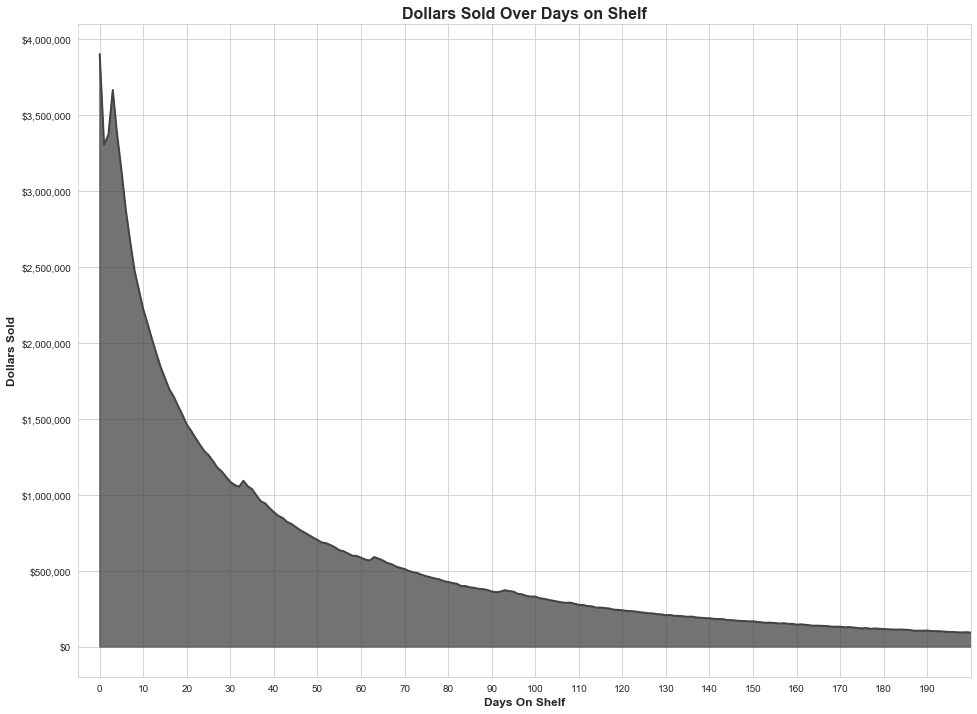

In [16]:
fig, ax = plt.subplots(figsize=(16,12))
plt_df = df.groupby('Days_Salable_Scanned').sum().reset_index()
ax.plot(plt_df['Days_Salable_Scanned'], plt_df['amt_PricedSold'], linewidth=2, color='#444444')
ax.fill_between(plt_df['Days_Salable_Scanned'], plt_df['amt_PricedSold'], color='#444444', alpha=0.75)
ax.set_xlim([-5,200])
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 200, 10))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')
ax.set_title('Dollars Sold Over Days on Shelf', fontsize=16, fontweight='bold')
plt.show()

In [17]:
def annot_text(t, xt, yt, ax=None, x=3, y=150, **kwargs):
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data',textcoords="offset points",
              bbox=bbox_props, ha="left", va="bottom", fontsize=14)
    ax.annotate(t, xy=(x, y), xytext=(xt,yt), **kw)

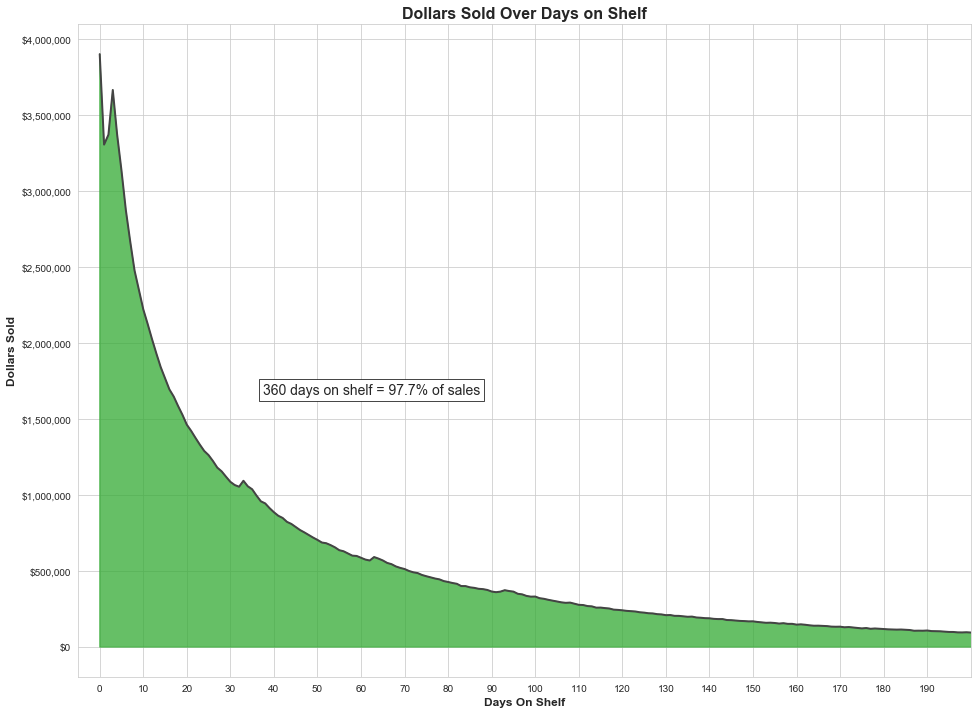

In [18]:
day_lim = 360
plt_df = df.groupby('Days_Salable_Scanned').sum().reset_index()
filt = plt_df['Days_Salable_Scanned'] >= day_lim
ffilt = plt_df['Days_Salable_Scanned'] <= day_lim

fig, ax = plt.subplots(figsize=(16,12))
ax.plot(plt_df['Days_Salable_Scanned'], plt_df['amt_PricedSold'], linewidth=2, color='#444444')

ax.fill_between(plt_df[filt]['Days_Salable_Scanned'], plt_df[filt]['amt_PricedSold'], color='#444444', alpha=0.75)
ax.fill_between(plt_df[ffilt]['Days_Salable_Scanned'], plt_df[ffilt]['amt_PricedSold'], color='#33aa33', alpha=0.75)

ax.set_xlim([-5,200])
yvals = ax.get_yticks()

ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 200, 10))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')
ax.set_title('Dollars Sold Over Days on Shelf', fontsize=16, fontweight='bold')


sales_pct = 1-plt_df[filt]['amt_PricedSold'].sum()/plt_df['amt_PricedSold'].sum()

sales_text = '{} days on shelf = {:.1%} of sales'.format(day_lim, sales_pct)
annot_text(sales_text, 150, 250)
#ax.axvline(x=84, color='black', linestyle = '--')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


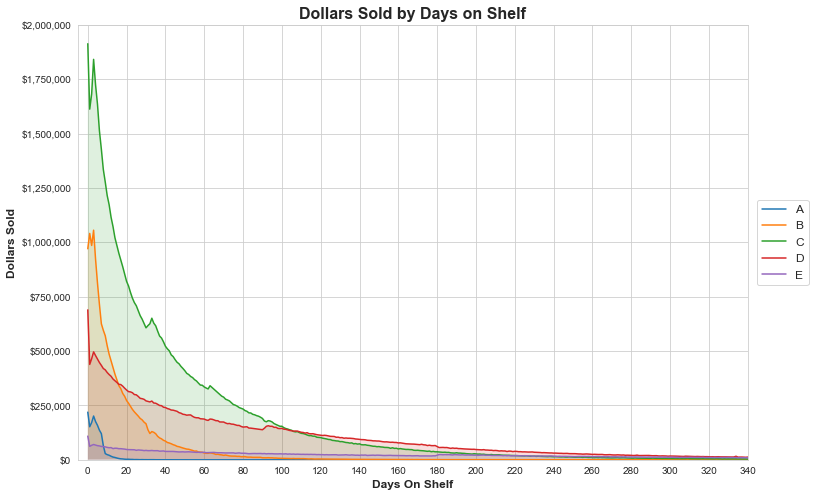

In [19]:
cmap = sns.color_palette()

lineplot_df = df.groupby(by=['Grade','Days_Salable_Scanned']).sum()
lineplot_df = lineplot_df.reset_index()

grade_list = lineplot_df['Grade'].unique()

cnum = 0
fig, ax = plt.subplots(figsize=(12,8))

for g in grade_list:
    grade_filt = lineplot_df['Grade'] == g
    
    color = cmap[cnum]
    cnum += 1

    ax.plot(lineplot_df[grade_filt]['Days_Salable_Scanned'], 
            lineplot_df[grade_filt]['amt_PricedSold'], color=color, label=g)
    
    ax.fill_between(lineplot_df[grade_filt]['Days_Salable_Scanned'], 
                    lineplot_df[grade_filt]['amt_PricedSold'], facecolor=color, alpha=0.15)
    
    ax.set_xlim([-5,200])
    ax.set_ylim([0,2e6])

    # Get y tick values and reformat them as percentages
    yvals = ax.get_yticks()
    ax.set_xticks(np.arange(0,360,20))
    ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])

    # Set axis labels and format text
    ax.set_xlabel('Days On Shelf', fontsize=12, fontweight='bold')
    ax.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')

    # Set plot title and format text
    ax.set_title('Dollars Sold by Days on Shelf', fontsize=16, fontweight='bold')
    
    ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=12)

    fn = 'dollars_sold_grade' + g +'.png'
    plt.savefig(fn, pad_inches=0.2, frameon=False)
    
plt.show()

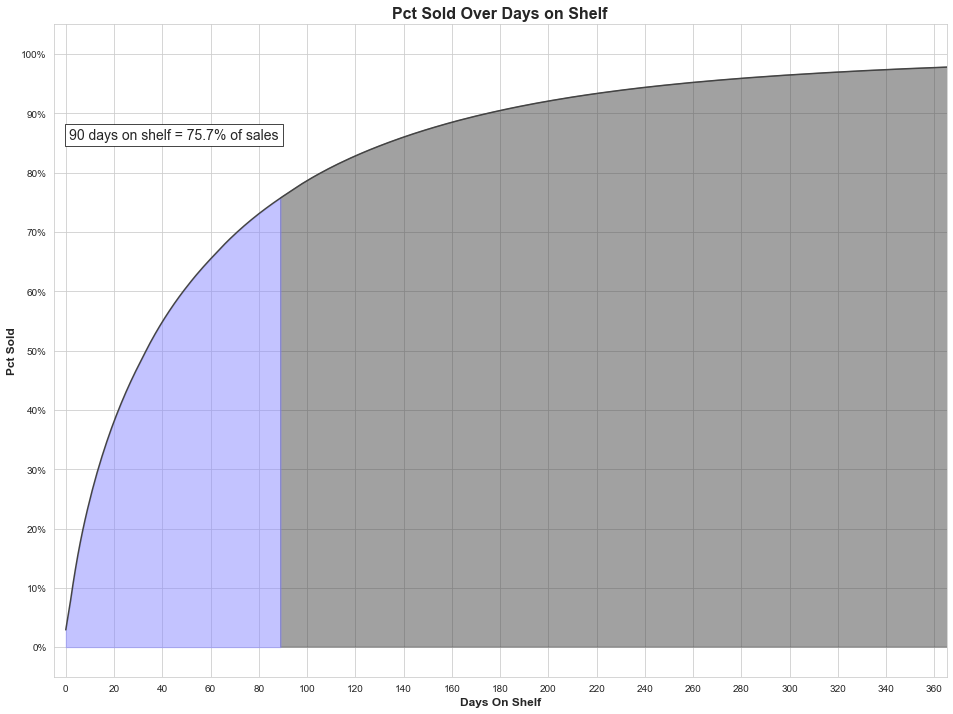

In [30]:
day_lim = 90


fig, ax = plt.subplots(figsize=(16,12))
plt_df = df.groupby('Days_Salable_Scanned').sum()['amt_PricedSold'].expanding().sum()/df['amt_PricedSold'].sum()


filt = plt_df.index >= (day_lim - 1)
ffilt = plt_df.index <= (day_lim - 1)

ax.plot(plt_df.index, plt_df.values, color = '#444444')
ax.fill_between(plt_df[filt].index, 
                plt_df[filt].values, color = '#444444', alpha=0.5)
ax.fill_between(plt_df[ffilt].index, 
                plt_df[ffilt].values, color = '#8888ff', alpha=0.5)               

ax.set_xlim([-5,365])
yvals = np.arange(0, 1.1, .1)
ax.set_yticks(yvals)
ax.set_yticklabels(['{:.0%}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Pct Sold', fontsize=12, fontweight='bold')
ax.set_title('Pct Sold Over Days on Shelf', fontsize=16, fontweight='bold')

sales_pct = plt_df.iloc[day_lim - 1]
sales_text = '{} days on shelf = {:.1%} of sales'.format(day_lim, sales_pct)
annot_text(sales_text, 1, 1, x=1, y=0.85)

plt.show()

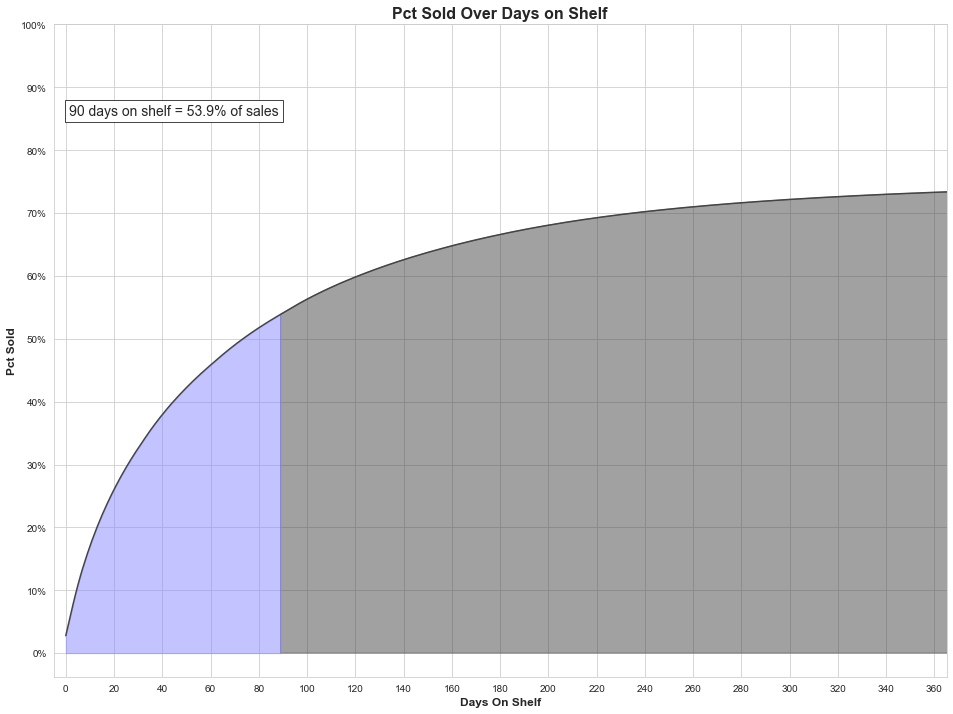

In [29]:
day_lim = 90


fig, ax = plt.subplots(figsize=(16,12))
plt_df = df.groupby('Days_Salable_Scanned').sum()['qty_PricedSold'].expanding().sum()/df['qty_Priced'].sum()


filt = plt_df.index >= (day_lim - 1)
ffilt = plt_df.index <= (day_lim - 1)

ax.plot(plt_df.index, plt_df.values, color = '#444444')
ax.fill_between(plt_df[filt].index, 
                plt_df[filt].values, color = '#444444', alpha=0.5)
ax.fill_between(plt_df[ffilt].index, 
                plt_df[ffilt].values, color = '#8888ff', alpha=0.5)               

ax.set_xlim([-5,365])
yvals = np.arange(0, 1.1, .1)
ax.set_yticks(yvals)
ax.set_yticklabels(['{:.0%}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Pct Sold', fontsize=12, fontweight='bold')
ax.set_title('Pct Sold Over Days on Shelf', fontsize=16, fontweight='bold')

sales_pct = plt_df.iloc[day_lim - 1]
sales_text = '{} days on shelf = {:.1%} of sales'.format(day_lim, sales_pct)
annot_text(sales_text, 1, 1, x=1, y=0.85)

plt.show()

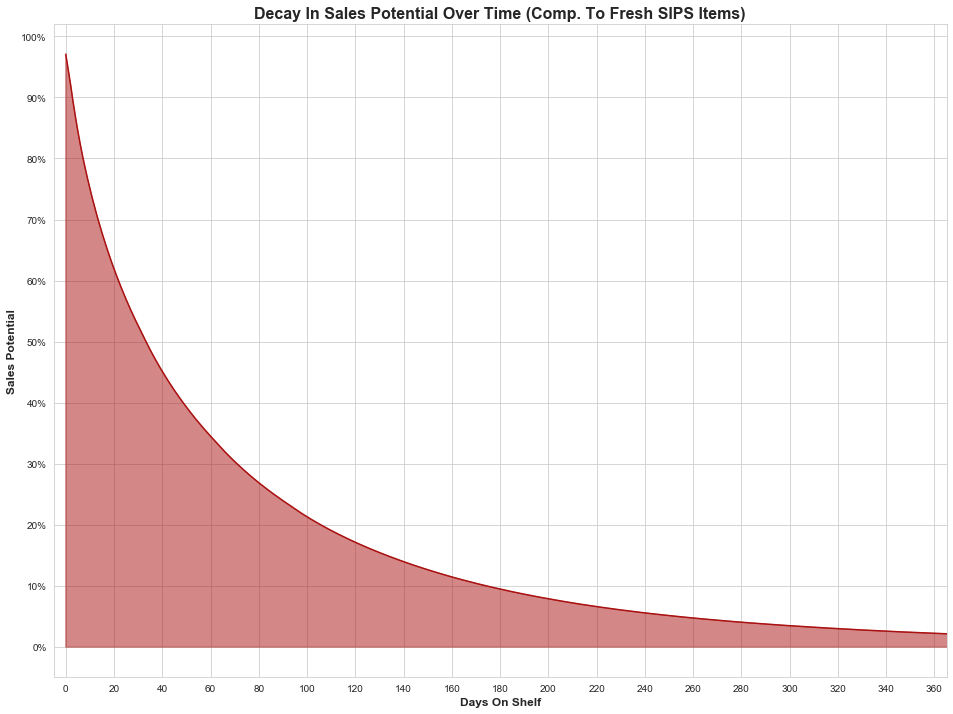

In [21]:
fig, ax = plt.subplots(figsize=(16,12))
plt_df = df.groupby('Days_Salable_Scanned').sum()['amt_PricedSold'].expanding().sum()/df['amt_PricedSold'].sum()

ax.plot(plt_df.index, 1-plt_df.values, color='#aa1111')
ax.fill_between(plt_df.index, 
                1-plt_df.values, alpha=0.5, color='#aa1111')
ax.set_xlim([-5,365])
yvals = np.arange(0, 1.1, .1)
ax.set_yticks(yvals)
ax.set_yticklabels(['{:.0%}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Sales Potential', fontsize=12, fontweight='bold')
ax.set_title('Decay In Sales Potential Over Time (Comp. To Fresh SIPS Items)', fontsize=16, fontweight='bold')
#ax.axvline(x=84, color='black', linestyle = '--')

plt.show()

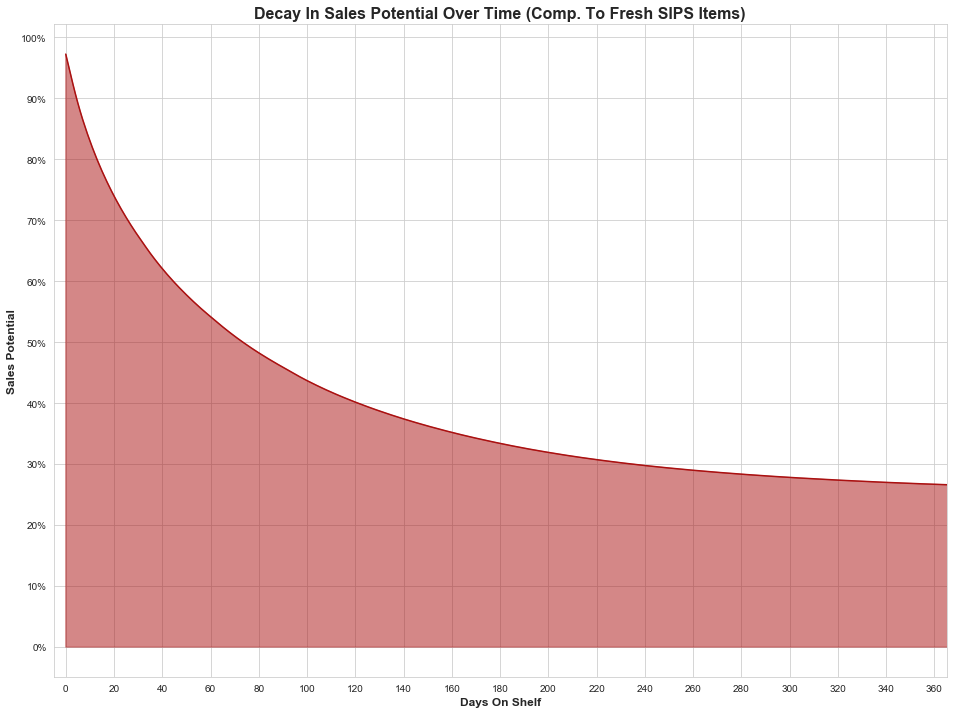

In [22]:
fig, ax = plt.subplots(figsize=(16,12))
plt_df = df.groupby('Days_Salable_Scanned').sum()['qty_PricedSold'].expanding().sum()/df['qty_Priced'].sum()

ax.plot(plt_df.index, 1-plt_df.values, color='#aa1111')
ax.fill_between(plt_df.index, 
                1-plt_df.values, alpha=0.5, color='#aa1111')
ax.set_xlim([-5,365])
yvals = np.arange(0, 1.1, .1)
ax.set_yticks(yvals)
ax.set_yticklabels(['{:.0%}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Sales Potential', fontsize=12, fontweight='bold')
ax.set_title('Decay In Sales Potential Over Time (Comp. To Fresh SIPS Items)', fontsize=16, fontweight='bold')
#ax.axvline(x=84, color='black', linestyle = '--')

plt.show()

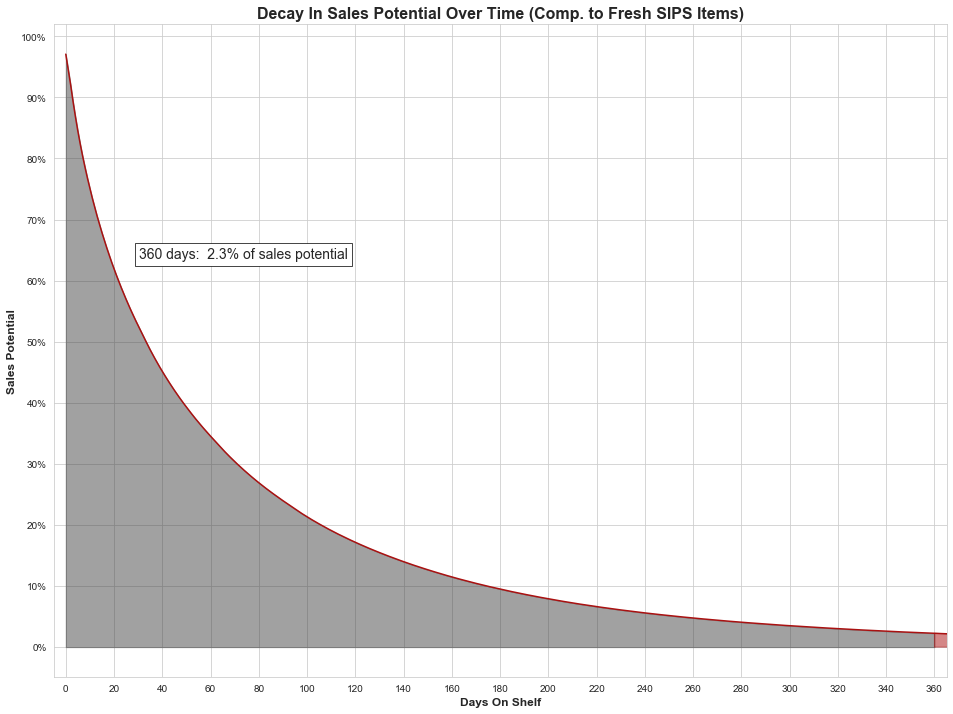

In [23]:
DaysShelved = 360

fig, ax = plt.subplots(figsize=(16,12))
plt_df = df.groupby('Days_Salable_Scanned').sum()['amt_PricedSold'].expanding().sum()/df['amt_PricedSold'].sum()

filt_pctdecay_below = plt_df.index <= DaysShelved
filt_pctdecay_above = plt_df.index >= DaysShelved

ax.plot(plt_df.index, 1-plt_df.values, color='#aa1111')
ax.fill_between(plt_df[filt_pctdecay_below].index, 
                1-plt_df[filt_pctdecay_below].values, alpha=0.5, color='#444444')
ax.fill_between(plt_df[filt_pctdecay_above].index, 
                1-plt_df[filt_pctdecay_above].values, alpha=0.5, color='#aa1111')


ax.set_xlim([-5,365])
yvals = np.arange(0, 1.1, .1)
ax.set_yticks(yvals)
ax.set_yticklabels(['{:.0%}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 365, 20))
ax.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax.set_ylabel('Sales Potential', fontsize=12, fontweight='bold')
ax.set_title('Decay In Sales Potential Over Time (Comp. to Fresh SIPS Items)', fontsize=16, fontweight='bold')
#ax.axvline(x=84, color='black', linestyle = '--')

decay_pct = plt_df[plt_df.index == DaysShelved].values[0]
text_pctdecay = '{0} days: {1: 0.1%} of sales potential'.format(DaysShelved, 1-decay_pct)

annot_text(text_pctdecay, 1, 1, x=30, y=0.63)
plt.show()

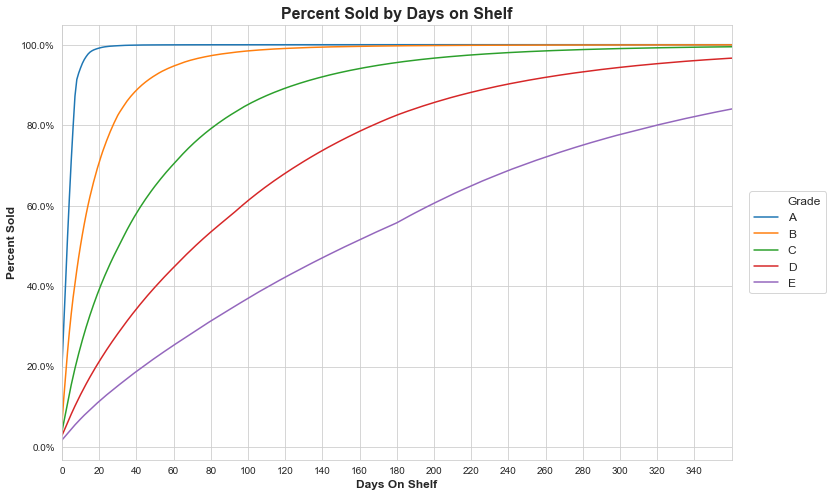

In [24]:
lineplot_df = df.groupby(by=['Grade','Days_Salable_Scanned']).sum().groupby(level=[0]).cumsum()
lineplot_df['cumul_pct'] = lineplot_df['qty_PricedSold']/df.groupby('Grade').sum()['qty_PricedSold']
lineplot_df = lineplot_df.reset_index()

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='Days_Salable_Scanned', y='cumul_pct', hue='Grade', data=lineplot_df, ax=ax)
ax.set_xlim([0,360])

# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_xticks(np.arange(0,360,20))
ax.set_yticklabels(['{:,.1%}'.format(v) for v in yvals])

# Set axis labels and format text
ax.set_xlabel('Days On Shelf', fontsize=12, fontweight='bold')
ax.set_ylabel('Percent Sold', fontsize=12, fontweight='bold')

# Set plot title and format text
ax.set_title('Percent Sold by Days on Shelf', fontsize=16, fontweight='bold')


ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), fontsize=12)

plt.show()

In [25]:
max_days = 365

df_allgrades = df.groupby('Days_Salable_Scanned').sum().reset_index()
df_rota = pd.DataFrame(columns=['amt_PricedSold', 
                                'qty_PricedSold', 
                                'qty_Priced', 
                                'avg_DaysOnShelf'], index=df_allgrades.index)


for i, v in df_allgrades.iterrows():
    rota_period = v['Days_Salable_Scanned'] + 1
    rota_lt_filt = (df_allgrades['Days_Salable_Scanned'] < rota_period)
    rota_gt_filt = (df_allgrades['Days_Salable_Scanned'] >= rota_period) \
                    & (df_allgrades['Days_Salable_Scanned'] <= max_days)
    
    df_rota.at[i, 'amt_PricedSold'] = (max_days/rota_period)*(df_allgrades[rota_lt_filt]['amt_PricedSold'].sum() \
                            - df_allgrades[rota_gt_filt]['amt_PricedSold'].sum())
    
    df_rota.at[i, 'qty_PricedSold'] = (max_days/rota_period)*(df_allgrades[rota_lt_filt]['qty_PricedSold'].sum() \
                            - df_allgrades[rota_gt_filt]['qty_PricedSold'].sum())
    
    df_rota.at[i, 'qty_Priced'] = (max_days/rota_period)*(df_allgrades[rota_lt_filt]['qty_Priced'].sum())
    
    df_rota.at[i, 'avg_DaysOnShelf'] = (df_allgrades[rota_lt_filt]['qty_Priced'] *  
        df_allgrades[rota_lt_filt]['Days_Salable_Scanned']).sum() / df_allgrades[rota_lt_filt]['qty_Priced'].sum()

In [26]:
def annot_graph(x,y, xt,yt, ax=None):
#     x=x.astype(float)
#     y=y.astype(float)
    text= "{:.0f} days, ${:,.2f}".format(x, y)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(facecolor='darkgrey', shrink=0.03)
    kw = dict(xycoords='data',textcoords="offset points",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", fontsize=12)
    ax.annotate(text, xy=(x, y), xytext=(xt,yt), **kw)

KeyError: 'Days_Salable_Scanned'

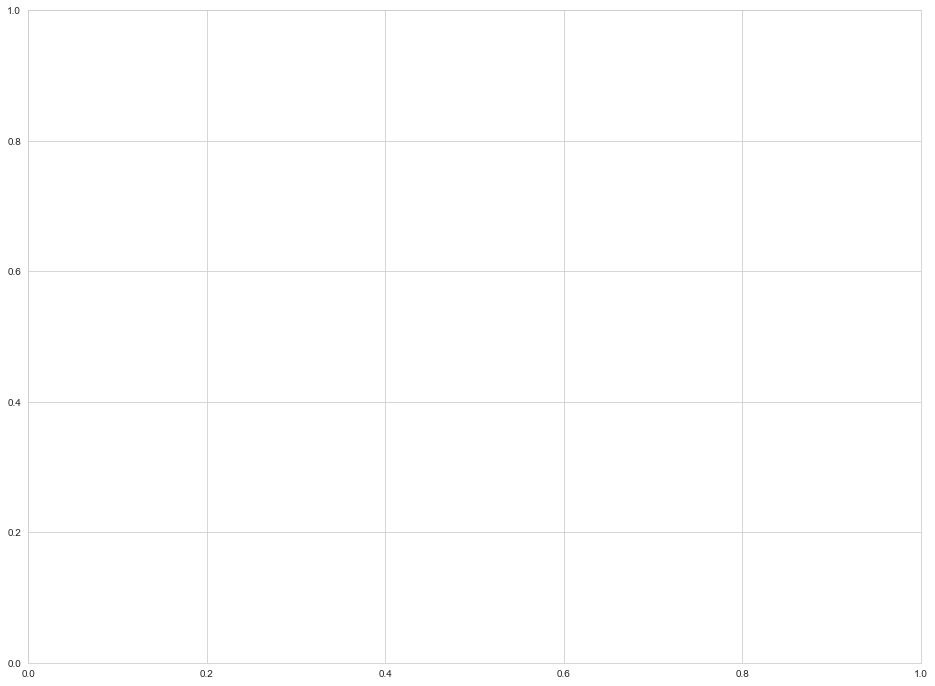

In [27]:
fig, ax = plt.subplots(figsize=(16,12))

ax.plot(df_rota['Days_Salable_Scanned'], df_rota['amt_PricedSold'])


ax.set_xlim([0,400])
ax.set_ylim([0, 3.5e8])

yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 401, 20))
# Set axis labels and format text
ax.set_xlabel('Rotation Frequency (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Projected Sales (Dollars)', fontsize=12, fontweight='bold')

# Set plot title and format text
ax.set_title('Projected Sales by Rotation Frequency', fontsize=16, fontweight='bold')

filt_max = df_rota['amt_PricedSold'] == df_rota['amt_PricedSold'].max()
filt_current = df_rota['Days_Salable_Scanned'] == 355
filt_270 = df_rota['Days_Salable_Scanned'] == 270
filt_180 = df_rota['Days_Salable_Scanned'] == 180
filt_123 = df_rota['Days_Salable_Scanned'] == 123

xmax = df_rota[filt_max].index[0]
ymax = df_rota[filt_max]['amt_PricedSold'].values[0]
xcurr = df_rota[filt_current].index[0]
ycurr = df_rota[filt_current]['amt_PricedSold'].values[0]
x270 = df_rota[filt_270].index[0]
y270 = df_rota[filt_270]['amt_PricedSold'].values[0]
x180 = df_rota[filt_180].index[0]
y180 = df_rota[filt_180]['amt_PricedSold'].values[0]
x123 = df_rota[filt_123].index[0]
y123 = df_rota[filt_123]['amt_PricedSold'].values[0]

annot_graph(xmax, ymax, 100, 50, ax)
annot_graph(xcurr, ycurr, 100, 50, ax)
# annot_graph(x270, y270, 100, 50, ax)
# annot_graph(x180, y180, 100, 50, ax)
# annot_graph(x123, y123, 100, 50, ax)
plt.show()


sales_actual = df['amt_PricedSold'].sum()

qty_pricemax = df_rota[filt_max]['qty_Priced'].values[0]
qty_sellmax = df_rota[filt_max]['qty_PricedSold'].values[0]
qty_actual = df['qty_Priced'].sum()

print('The chain average optimal used item rotation is {:.0f} days.'.format(xmax) +
      '\nThe projected sales total resulting from this rotation is ${:,.0f}'.format(ymax))

print('\nThis would require pricing {:,.0f} SIPS items and selling {:,.0f} of them'.format(qty_pricemax, qty_sellmax) + 
      '\nThe total number of items SIPS\'d in 2016 was {:,.0f}'.format(qty_actual))

print('\nActual sales totals from catalogued SIPS items priced in 2016 was ${:,.0f}'.format(sales_actual))

In [ ]:
df_rota['amt_NetSales'] = df_rota['amt_PricedSold'] - df_rota['qty_Priced'] * 0.85

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))

ax.plot(df_rota['Days_Salable_Scanned'], df_rota['amt_NetSales'])


ax.set_xlim([0,400])
ax.set_ylim([0, 3e8])

yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 401, 20))
# Set axis labels and format text
ax.set_xlabel('Rotation Frequency (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Projected Sales (Dollars)', fontsize=12, fontweight='bold')

# Set plot title and format text
ax.set_title('Projected Net Sales by Rotation Frequency', fontsize=16, fontweight='bold')

filt_max = df_rota['amt_NetSales'] == df_rota['amt_NetSales'].max()
filt_current = df_rota['Days_Salable_Scanned'] == 355
filt_270 = df_rota['Days_Salable_Scanned'] == 270
filt_180 = df_rota['Days_Salable_Scanned'] == 180
filt_123 = df_rota['Days_Salable_Scanned'] == 123

xmax = df_rota[filt_max].index[0]
ymax = df_rota[filt_max]['amt_NetSales'].values[0]
xcurr = df_rota[filt_current].index[0]
ycurr = df_rota[filt_current]['amt_NetSales'].values[0]
x270 = df_rota[filt_270].index[0]
y270 = df_rota[filt_270]['amt_NetSales'].values[0]
x180 = df_rota[filt_180].index[0]
y180 = df_rota[filt_180]['amt_NetSales'].values[0]
x123 = df_rota[filt_123].index[0]
y123 = df_rota[filt_123]['amt_PricedSold'].values[0]

annot_graph(xmax, ymax, 100, 50, ax)
annot_graph(xcurr, ycurr, 100, 50, ax)
# annot_graph(x270, y270, 100, 50, ax)
# annot_graph(x180, y180, 100, 50, ax)
# annot_graph(x123, y123, 100, 50, ax)
plt.show()


sales_actual = df['amt_PricedSold'].sum() - df['qty_Priced'].sum() * 0.85

qty_pricemax = df_rota[filt_max]['qty_Priced'].values[0]
qty_sellmax = df_rota[filt_max]['qty_PricedSold'].values[0]
qty_actual = df['qty_Priced'].sum()

print('The chain average optimal used item rotation is {:.0f} days.'.format(xmax) +
      '\nThe projected sales total resulting from this rotation is ${:,.0f}'.format(ymax))

print('\nThis would require pricing {:,.0f} SIPS items and selling {:,.0f} of them'.format(qty_pricemax, qty_sellmax) + 
      '\nThe total number of items SIPS\'d in 2016 was {:,.0f}'.format(qty_actual))

print('\nActual sales totals from catalogued SIPS items priced in 2016 was ${:,.0f}'.format(sales_actual))

In [ ]:
cost_rotalabor = 0.50
cost_aggrotalabor = cost_rotalabor * (df_rota['qty_Priced'] - df_rota['qty_PricedSold'])
df_rota['amt_NetSales_plusLabor'] = df_rota['amt_PricedSold'] -df_rota['qty_Priced'] * 0.85 - cost_aggrotalabor

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))

ax.plot(df_rota['Days_Salable_Scanned'], df_rota['amt_NetSales_plusLabor'])


ax.set_xlim([0,400])
ax.set_ylim([0, 3e8])

yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax.set_xticks(np.arange(0, 401, 20))
# Set axis labels and format text
ax.set_xlabel('Rotation Frequency (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Projected Sales (Dollars)', fontsize=12, fontweight='bold')

# Set plot title and format text
ax.set_title('Projected Net Sales Minus Labor by Rotation Frequency', fontsize=16, fontweight='bold')

filt_max = df_rota['amt_NetSales_plusLabor'] == df_rota['amt_NetSales_plusLabor'].max()
filt_current = df_rota['Days_Salable_Scanned'] == 355
filt_270 = df_rota['Days_Salable_Scanned'] == 270
filt_180 = df_rota['Days_Salable_Scanned'] == 180
filt_123 = df_rota['Days_Salable_Scanned'] == 123

xmax = df_rota[filt_max].index[0]
ymax = df_rota[filt_max]['amt_NetSales_plusLabor'].values[0]
xcurr = df_rota[filt_current].index[0]
ycurr = df_rota[filt_current]['amt_NetSales_plusLabor'].values[0]
x270 = df_rota[filt_270].index[0]
y270 = df_rota[filt_270]['amt_NetSales_plusLabor'].values[0]
x180 = df_rota[filt_180].index[0]
y180 = df_rota[filt_180]['amt_NetSales_plusLabor'].values[0]
x123 = df_rota[filt_123].index[0]
y123 = df_rota[filt_123]['amt_NetSales_plusLabor'].values[0]

annot_graph(xmax, ymax, 100, 50, ax)
annot_graph(xcurr, ycurr, 100, 50, ax)
# annot_graph(x270, y270, 100, 50, ax)
# annot_graph(x180, y180, 100, 50, ax)
# annot_graph(x123, y123, 100, 50, ax)
plt.show()


sales_actual = df['amt_PricedSold'].sum() - df['qty_Priced'].sum() * 0.85

qty_pricemax = df_rota[filt_max]['qty_Priced'].values[0]
qty_sellmax = df_rota[filt_max]['qty_PricedSold'].values[0]
qty_actual = df['qty_Priced'].sum()

print('The chain average optimal used item rotation is {:.0f} days.'.format(xmax) +
      '\nThe projected sales total resulting from this rotation is ${:,.0f}'.format(ymax))

print('\nThis would require pricing {:,.0f} SIPS items and selling {:,.0f} of them'.format(qty_pricemax, qty_sellmax) + 
      '\nThe total number of items SIPS\'d in 2016 was {:,.0f}'.format(qty_actual))

print('\nActual sales totals from catalogued SIPS items priced in 2016 was ${:,.0f}'.format(sales_actual))

In [ ]:
sns.set_style('whitegrid')
opt_filt = df['Days_Salable_Scanned'] <= xmax
sto_barplot_df = (df[opt_filt].groupby('Grade')['qty_PricedSold'].sum()/df.groupby('Grade')['qty_Priced'].sum())
sto_barplot_df= sto_barplot_df.reset_index()
sto_barplot_df.columns = ['Grade', 'ST']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Grade', y='ST', 
            data=st_barplot_df, ax=ax, 
            alpha=0.4, edgecolor='0.1')
sns.barplot(x='Grade', y='ST', 
            data=sto_barplot_df, ax=ax, 
            alpha=1, edgecolor='0.1')


   
ax.set_ylim([0,1])

# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(v) for v in yvals])

# Set a white y axis grid over the bars
ax.set_axisbelow(False)
ax.yaxis.grid(color='white', linestyle='solid')

# Set tick label font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Set axis labels
ax.set_xlabel('Buy Grade')
ax.set_ylabel('Pct Sell-through')

# Set font title, fontsize, and fontweight
ax.set_title('Optimum Sell-through vs Actual', fontsize=16, fontweight='bold')

#Set up legend
labels_act = [(str(g) + ' Actual') for g in st_barplot_df['Grade'].unique()]
labels_opt = [(str(g) + ' Optimal') for g in sto_barplot_df['Grade'].unique()]


legend_labels = labels_act + labels_opt
legend_colors = [p.get_facecolor() for p in ax.patches]
legend_patches = list(zip(legend_colors, legend_labels))

legend_handles = [mpatches.Patch(color=c, label=l) for (c, l) in legend_patches]

plt.legend(handles=legend_handles, labels=legend_labels, 
           loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=12)

plt.show()

In [ ]:
df[opt_filt]['qty_PricedSold'].sum()/df['qty_Priced'].sum()

In [ ]:
max_days = 365

df_graderota = pd.DataFrame(columns=['Days_Salable_Scanned', 'Grade','amt_PricedSold', 'qty_PricedSold', 'qty_Priced'], 
                            index=df.index)
df_graderota[['Days_Salable_Scanned', 'Grade']] = df[['Days_Salable_Scanned', 'Grade']]

for i, v in df.iterrows():
    rota_period = v['Days_Salable_Scanned'] + 1
    rota_grade = v['Grade']
    rota_lt_filt = (df['Days_Salable_Scanned'] < rota_period) & (df['Grade'] == rota_grade)
    rota_gt_filt = (df['Days_Salable_Scanned'] >= rota_period) & (df['Grade'] == rota_grade) & \
                            (df['Days_Salable_Scanned'] <= max_days)
    df_graderota.at[i, 'amt_PricedSold'] = (max_days/rota_period)*(df[rota_lt_filt]['amt_PricedSold'].sum() \
                            - df[rota_gt_filt]['amt_PricedSold'].sum())
    df_graderota.at[i, 'qty_PricedSold'] = (max_days/rota_period)*(df[rota_lt_filt]['qty_PricedSold'].sum() \
                            - df[rota_gt_filt]['qty_PricedSold'].sum())
    df_graderota.at[i, 'qty_Priced'] = (max_days/rota_period)*(df[rota_lt_filt]['qty_Priced'].sum())

In [ ]:
#df_graderota.columns = ['Grade', 'amt_PricedSold', 'Days_Salable_Scanned']
df_graderota['amt_PricedSold'] = df_graderota['amt_PricedSold'].astype(float)
df_graderota['qty_PricedSold'] = df_graderota['qty_PricedSold'].astype(float)
df_graderota['qty_Priced'] = df_graderota['qty_Priced'].astype(float)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='Days_Salable_Scanned', y='amt_PricedSold', hue='Grade', data=df_graderota, ax=ax)
ax.set_xlim([0,365])
ax.set_ylim([0,2.5e8])

# Get y tick values and reformat them as percentages
yvals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])

# Set axis labels and format text
ax.set_xlabel('Rotation Frequency (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Projected Sales (Dollars)', fontsize=12, fontweight='bold')



max_grade = {}

for g in df_graderota['Grade'].unique():
    filt_grade = df_graderota['Grade'] == g
    filt_max = df_graderota['amt_PricedSold'] == df_graderota[filt_grade]['amt_PricedSold'].max()
    max_grade[g] = df_graderota[filt_max]
    annot_max(max_grade[g]['Days_Salable_Scanned'].values[0], max_grade[g]['amt_PricedSold'].values[0], ax)
    
# Set plot title and format text
ax.title.set_position([.5, 1.05])
ax.set_title('Projected Sales by Rotation Frequency Per Grade', fontsize=16, fontweight='bold')


ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), fontsize=12)

plt.show()
for g in df_graderota['Grade'].unique():
        max_sales = max_grade[g]['amt_PricedSold'].values[0]
        max_pricedqty = max_grade[g]['qty_Priced'].values[0]
        max_soldqty = max_grade[g]['qty_PricedSold'].values[0]
        max_stpct = max_soldqty/max_pricedqty
        print('Achieving the optimal sales amount of ${:,.0f}'.format(max_sales) +
              ' for grade {0} would require {1:,.0f} items of grade {0}.'.format(g, max_pricedqty))
        print('{:,.0f} of these items would be projected to sell'.format(max_soldqty, max_pricedqty) +
              ' giving a sell-through rate of {:0.1%}\n'.format(max_stpct))

In [ ]:
df.groupby('Grade').sum()

In [ ]:
df.sum()

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,8))
sns.lineplot(x='Days_Salable_Scanned', y='amt_PricedSold', data=df, hue='Grade', size_norm=2, ax=ax1)
ax1.set_xlim([25,45])
ax1.set_ylim([0,700000])
yvals = ax1.get_yticks()
ax1.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax1.set_xticks(np.arange(25, 50, 5))
ax1.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax1.set_ylabel('Dollars Sold', fontsize=12, fontweight='bold')
ax1.legend('')

plt_df = df.groupby('Days_Salable_Scanned').sum().reset_index()
ax2.plot(plt_df['Days_Salable_Scanned'], plt_df['amt_PricedSold'], linewidth=2, color='#444444')
ax2.fill_between(plt_df['Days_Salable_Scanned'],plt_df['amt_PricedSold'], color='#444444', alpha=0.75)
ax2.set_xlim([25,45])
ax2.set_ylim([0,1.4e6])
yvals = ax2.get_yticks()
ax2.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax2.set_xticks(np.arange(25, 50, 5))
ax2.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax2.set_ylabel('')

sns.lineplot(x='Days_Salable_Scanned', y='amt_PricedSold', data=df, hue='Grade', size_norm=2, ax=ax3)
ax3.set_xlim([85,105])
ax3.set_ylim([0,250000])
yvals = ax3.get_yticks()
ax3.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax3.set_xticks(np.arange(85, 110, 5))
ax3.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax3.set_ylabel('')
ax3.legend('')


plt_df = df.groupby('Days_Salable_Scanned').sum().reset_index()
ax4.plot(plt_df['Days_Salable_Scanned'], plt_df['amt_PricedSold'], linewidth=2, color='#444444')
ax4.fill_between(plt_df['Days_Salable_Scanned'],plt_df['amt_PricedSold'], color='#444444', alpha=0.75)
ax4.set_xlim([85,105])
ax4.set_ylim([0,500000])
yvals = ax4.get_yticks()
ax4.set_yticklabels(['${:,.0f}'.format(v) for v in yvals])
ax4.set_xticks(np.arange(85, 110, 5))
ax4.set_xlabel('Days On Shelf', fontsize=12 , fontweight='bold')
ax4.set_ylabel('')



plt.tight_layout()


plt.show()